<a href="https://colab.research.google.com/github/socktapus/heaviness-test/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


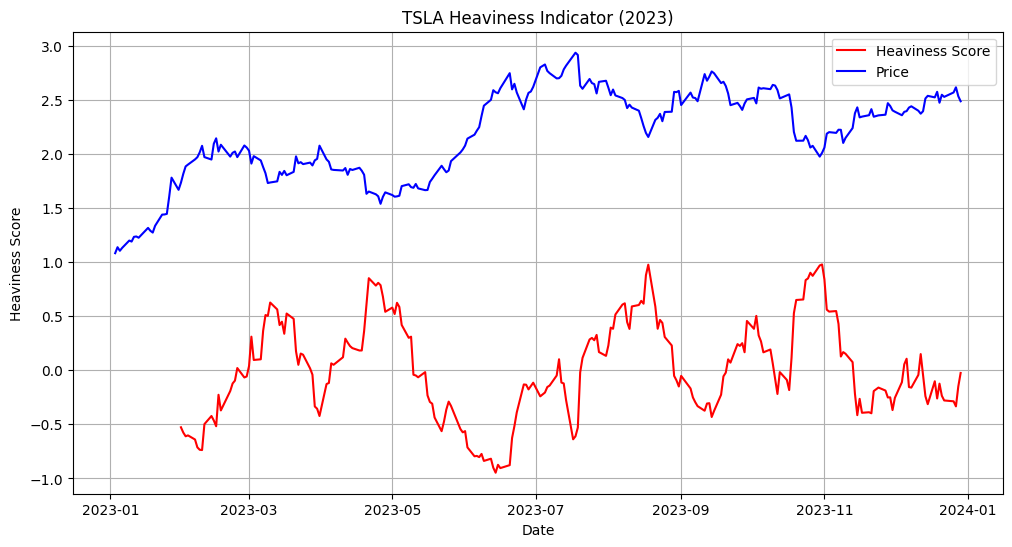

The Heaviness Indicator has been calculated and saved to TSLA_Heaviness_Indicator.csv


In [28]:
!pip install pandas yfinance matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for the past 12 months
ticker = "TSLA"
ticker_data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Function to calculate heaviness indicator
def calculate_heaviness(data):

    # Calculate moving averages for volume
    data['Average Volume', ticker] = data['Volume'].rolling(window=20).mean()

    # Volume Factor
    data['Volume Factor'] = data['Volume'] / data['Average Volume']

    # Price Factor
    data['Price Factor'] = (data['Close'] - data['Open']) / data['Close']

    # RSI calculation
    def rsi(series, period=14):
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))

    data['RSI'] = rsi(data['Close'])
    data['RSI Factor'] = (50 - data['RSI']) / 50

    # Resistance Factor (using recent high as a proxy)
    data['Resistance Level', ticker] = data['High'].rolling(window=20).max()
    data['Resistance Factor'] = (data['Resistance Level'] - data['Close']) / data['Resistance Level']

    # Combine into Heaviness Score
    data['Heaviness Score'] = (data['Volume Factor'] * data['Price Factor']) + data['RSI Factor'] + data['Resistance Factor']

    return data

# Calculate heaviness indicator for
ticker_data = calculate_heaviness(ticker_data)

# Plot the Heaviness Score
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index, ticker_data['Heaviness Score'], label='Heaviness Score', color='red')
plt.plot(ticker_data.index, ticker_data['Close']/100, label='Price', color='blue')
plt.title(f'{ticker} Heaviness Indicator (2023)')
plt.xlabel('Date')
plt.ylabel('Heaviness Score')
plt.legend()
plt.grid()
plt.show()

# Save the results to a CSV file
ticker_data.to_csv(f"{ticker}_Heaviness_Indicator.csv")
print(f"The Heaviness Indicator has been calculated and saved to {ticker}_Heaviness_Indicator.csv")